# Курсовой проект Real Estate Price Prediction.

    Don't cheat!
    Apply yourself!
    Have fun!


### File descriptions:

    train.csv - the training set
    test.csv - the test set
    sampleSubmission.csv - a sample submission file in the correct format


### Data fields:

    Id - идентификационный номер квартиры
    DistrictId - идентификационный номер района
    Rooms - количество комнат
    Square - площадь
    LifeSquare - жилая площадь
    KitchenSquare - площадь кухни
    Floor - этаж
    HouseFloor - количество этажей в доме
    HouseYear - год постройки дома
    Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности
    Social_1, Social_2, Social_3 - социальные показатели местности
    Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья
    Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров
    Price - цена квартиры


**Подключение библиотек и скриптов:**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.manifold import TSNE
from scipy.stats import norm
from scipy import stats
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse
from sklearn.ensemble import RandomForestRegressor, StackingRegressor, VotingRegressor,  GradientBoostingRegressor
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from datetime import datetime

import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

matplotlib.rcParams.update({'font.size': 11})

In [2]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
          
    print("Train MSE:\t" + str(round(mse(train_true_values, train_pred_values), 3)))
    print("Test MSE:\t" + str(round(mse(test_true_values, test_pred_values), 3)))
         
    plt.figure(figsize=(16,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

In [3]:
train_data = pd.read_csv('V:/train.csv')
test_data = pd.read_csv('V:/test.csv')

In [4]:
train_data.tail(10).transpose()

9990      9991      9992        9993      9994      9995  \
Id                10635     11173     11753        9289      4356      1260   
DistrictId           21         6        37           1         9        61   
Rooms                 1         2         2           3         1         2   
Square           18.984   62.6488   50.9027     84.4861   43.3035   49.0907   
LifeSquare      11.4198       NaN   27.1595     88.9315   21.5191   33.2726   
KitchenSquare         2         0         6           0         8         6   
Floor                 1         6         4           4        12         3   
HouseFloor            5        17         9          22        14        12   
HouseYear          1967      1977      1972        2016      1992      1981   
Ecology_1      0.194489  0.243205  0.127812  0.00712232  0.161532  0.300323   
Ecology_2             B         B         B           B         B         B   
Ecology_3             B         B         B           B         B         B   
Social_1             47         5        28           1        25        52   
Social_2           8004      1564      7287         264      5648     10311   
Social_3              3         0         5           0         1         6   
Healthcare_1        125       540       320         NaN        30       NaN   
Helthcare_2           3         0         1           0         2         1   
Shops_1               5         0         3           1         4         9   
Shops_2               B         B         B           B         B         B   
Price            112411    182626    196641      264214    136744    119367   

                    9996      9997      9998      9999  
Id                 16265      2795     14561      7202  
DistrictId            27       178        21        94  
Rooms                  2         1         1         1  
Square           64.3077   29.6481   32.3303   35.8155  
LifeSquare       37.0384   16.5554   22.3269   22.3014  
KitchenSquare          9         5         5         6  
Floor                 13         3         3         9  
HouseFloor             0         5         9         9  
HouseYear           1977      1958      1969      1975  
Ecology_1      0.0721576  0.460556  0.194489  0.127376  
Ecology_2              B         B         B         B  
Ecology_3              B         B         B         B  
Social_1               2        20        47        43  
Social_2             629      4386      8004      8429  
Social_3               1        14         3         3  
Healthcare_1         NaN       NaN       125       NaN  
Helthcare_2            0         1         3         3  
Shops_1                0         5         5         9  
Shops_2                A         B         B         B  
Price             199715    165954    171842    177686

In [5]:
test_data.tail(10).transpose()

4990         4991        4992      4993       4994  \
Id                10158         8252        8834     14676      13060   
DistrictId           46           47          81         6         25   
Rooms                 2            2           1         1          2   
Square          46.2885      48.1072      36.849   48.4351    51.1449   
LifeSquare      27.2708      29.2088     23.4899       NaN    48.9795   
KitchenSquare         6            6          10         1          1   
Floor                 7            5           5        18         18   
HouseFloor            9            9          12        25         25   
HouseYear          1974         1976        1970      1977       2015   
Ecology_1      0.150818  6.99893e-05  0.00607615  0.243205  0.0697534   
Ecology_2             B            B           B         B          B   
Ecology_3             B            B           B         B          B   
Social_1             16           46          30         5         53   
Social_2           3433        10309        5285      1564      13670   
Social_3              4            1           0         0          4   
Healthcare_1       2643          240         645       540        NaN   
Helthcare_2           4            1           6         0          1   
Shops_1               5           16           6         0         11   
Shops_2               B            B           B         B          B   

                    4995      4996      4997       4998      4999  
Id                 10379     16138      3912       5722     11004  
DistrictId            29        38       101         10        21  
Rooms                  2         3         1          1         2  
Square           43.1775   93.6981   33.6567    38.6352   67.1227  
LifeSquare       30.3399   94.5215   19.0033    20.9763   33.9443  
KitchenSquare          5        10         5          9        13  
Floor                  6        21         2          8         9  
HouseFloor             5        27         5         14        17  
HouseYear           1962      2018      1966       1970      2009  
Ecology_1      0.0696603  0.060753  0.038693  0.0890397  0.194489  
Ecology_2              B         B         B          B         B  
Ecology_3              B         B         B          B         B  
Social_1              31        15        28         33        47  
Social_2            6119      2787      6533       7976      8004  
Social_3               4         2         1          5         3  
Healthcare_1         NaN       520      1015        NaN       125  
Helthcare_2            1         0         2          0         3  
Shops_1                2         7         5         11         5  
Shops_2                B         B         B          B         B

In [6]:
print('Строк в трейне:', train_data.shape[0])
print('Строк в тесте', test_data.shape[0])

Строк в трейне: 10000
Строк в тесте 5000


In [7]:
train_data.shape[1] - 1 == test_data.shape[1]

True

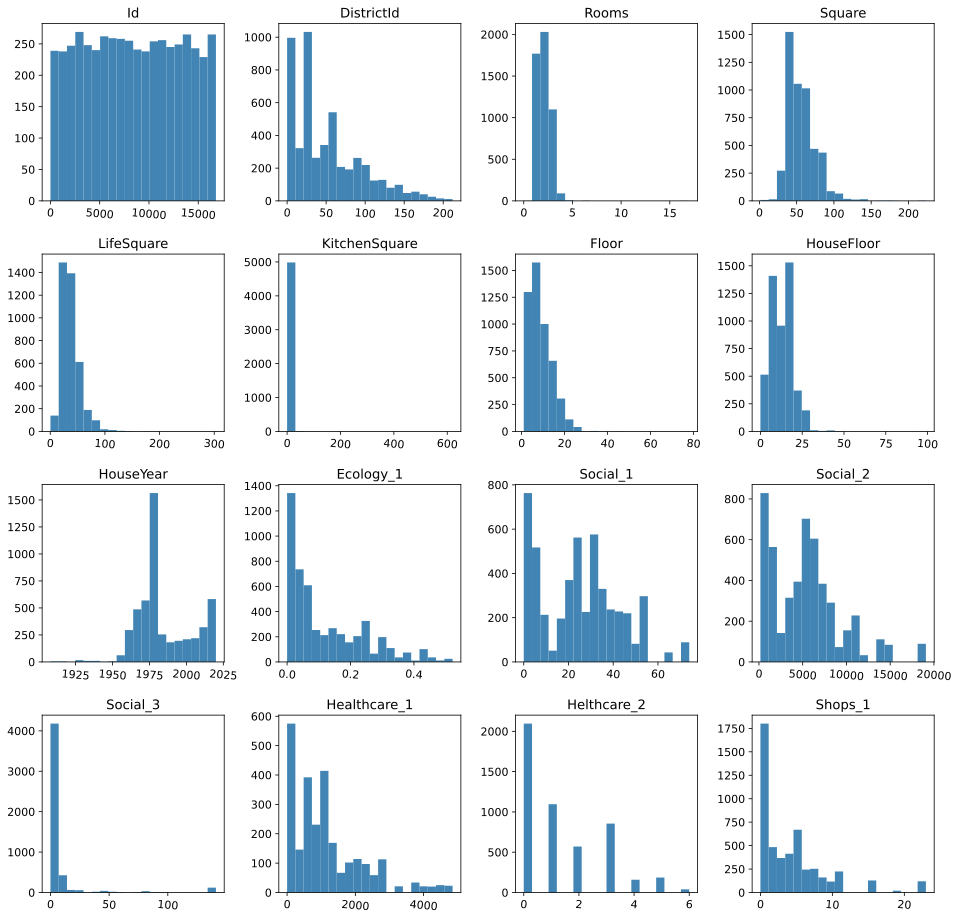

In [8]:
test_data.hist(figsize=(16,16), xrot=-5, bins=20, grid=False, color='#4285B4') 

plt.show()


**Приведение типов (Type conversion):**


In [9]:
train_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

**Оптимизация памяти (Optimizing memory):**

In [10]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [11]:

train_data = reduce_mem_usage(train_data)

Memory usage of dataframe is 1.53 MB
Memory usage after optimization is: 0.49 MB
Decreased by 68.1%


In [12]:
test_data = reduce_mem_usage(test_data)

Memory usage of dataframe is 0.72 MB
Memory usage after optimization is: 0.21 MB
Decreased by 70.3%


In [13]:
train_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             10000 non-null  int16   
 1   DistrictId     10000 non-null  int16   
 2   Rooms          10000 non-null  float32 
 3   Square         10000 non-null  float32 
 4   LifeSquare     7887 non-null   float32 
 5   KitchenSquare  10000 non-null  float32 
 6   Floor          10000 non-null  int8    
 7   HouseFloor     10000 non-null  float32 
 8   HouseYear      10000 non-null  int32   
 9   Ecology_1      10000 non-null  float32 
 10  Ecology_2      10000 non-null  category
 11  Ecology_3      10000 non-null  category
 12  Social_1       10000 non-null  int8    
 13  Social_2       10000 non-null  int16   
 14  Social_3       10000 non-null  int16   
 15  Healthcare_1   5202 non-null   float32 
 16  Helthcare_2    10000 non-null  int8    
 17  Shops_1        10000 non-null  i

In [14]:
train_data['Id'] = train_data['Id'].astype(str)
train_data['DistrictId'] = train_data['DistrictId'].astype(str)

In [15]:
train_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             10000 non-null  object  
 1   DistrictId     10000 non-null  object  
 2   Rooms          10000 non-null  float32 
 3   Square         10000 non-null  float32 
 4   LifeSquare     7887 non-null   float32 
 5   KitchenSquare  10000 non-null  float32 
 6   Floor          10000 non-null  int8    
 7   HouseFloor     10000 non-null  float32 
 8   HouseYear      10000 non-null  int32   
 9   Ecology_1      10000 non-null  float32 
 10  Ecology_2      10000 non-null  category
 11  Ecology_3      10000 non-null  category
 12  Social_1       10000 non-null  int8    
 13  Social_2       10000 non-null  int16   
 14  Social_3       10000 non-null  int16   
 15  Healthcare_1   5202 non-null   float32 
 16  Helthcare_2    10000 non-null  int8    
 17  Shops_1        10000 non-null  i


**Целевая переменная:**


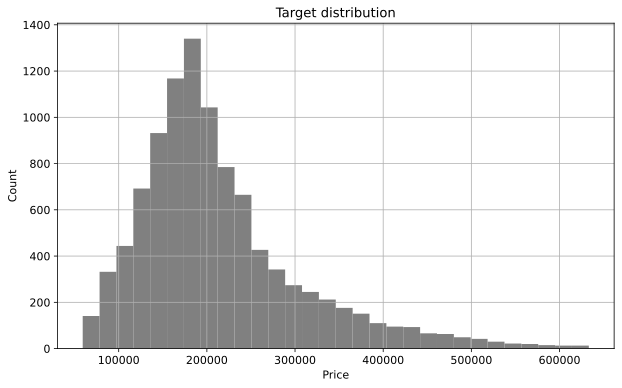

In [16]:
plt.figure(figsize = (10, 6))

train_data['Price'].hist(bins=30, color='Grey')
plt.ylabel('Count')
plt.xlabel('Price')

plt.title('Target distribution')
plt.show()


**Количественные переменные (Непрерывные):** 

In [17]:
train_data.describe().transpose()

count           mean            std           min  \
Rooms          10000.0       1.890500       0.839522      0.000000   
Square         10000.0      56.315720      21.058716      1.136859   
LifeSquare      7887.0      37.199665      86.241219      0.370619   
KitchenSquare  10000.0       6.273300      28.560839      0.000000   
Floor          10000.0       8.526700       5.241148      1.000000   
HouseFloor     10000.0      12.609400       6.776200      0.000000   
HouseYear      10000.0    3990.166300  200500.261427   1910.000000   
Ecology_1      10000.0       0.118858       0.119025      0.000000   
Social_1       10000.0      24.687000      17.532614      0.000000   
Social_2       10000.0    5352.157400    4006.799803    168.000000   
Social_3       10000.0       8.039200      23.831875      0.000000   
Healthcare_1    5202.0    1142.904419    1021.519470      0.000000   
Helthcare_2    10000.0       1.319500       1.493601      0.000000   
Shops_1        10000.0       4.231300       4.806341      0.000000   
Price          10000.0  214138.937500   92872.273438  59174.777344   

                         25%            50%            75%           max  
Rooms               1.000000       2.000000       2.000000  1.900000e+01  
Square             41.774879      52.513309      65.900627  6.410652e+02  
LifeSquare         22.769833      32.781261      45.128803  7.480592e+03  
KitchenSquare       1.000000       6.000000       9.000000  2.014000e+03  
Floor               4.000000       7.000000      12.000000  4.200000e+01  
HouseFloor          9.000000      13.000000      17.000000  1.170000e+02  
HouseYear        1974.000000    1977.000000    2001.000000  2.005201e+07  
Ecology_1           0.017647       0.075424       0.195781  5.218670e-01  
Social_1            6.000000      25.000000      36.000000  7.400000e+01  
Social_2         1564.000000    5285.000000    7227.000000  1.908300e+04  
Social_3            0.000000       2.000000       5.000000  1.410000e+02  
Healthcare_1      350.000000     900.000000    1548.000000  4.849000e+03  
Helthcare_2         0.000000       1.000000       2.000000  6.000000e+00  
Shops_1             1.000000       3.000000       6.000000  2.300000e+01  
Price          153872.628906  192269.648438  249135.460938  6.332334e+05

**Номинативные переменные (Неколичественные):**

In [18]:
train_data.select_dtypes(include='object').columns.tolist()

['Id', 'DistrictId']

In [19]:
train_data['DistrictId'].value_counts()

27     851
1      652
23     565
6      511
9      294
      ... 
207      1
174      1
199      1
196      1
209      1
Name: DistrictId, Length: 205, dtype: int64

In [20]:
train_data['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [21]:
train_data['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

**Rooms (Комнаты):**

In [22]:
train_data['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [23]:
train_data['Rooms_outlier'] = 0
train_data.loc[(train_data['Rooms'] == 0) | (train_data['Rooms'] >= 6), 'Rooms_outlier'] = 1
train_data.head(10).transpose()

0         1          2           3         4  \
Id                 11809      3013       8215        2352     13866   
DistrictId            27        22          1           1        94   
Rooms                  3         1          3           1         2   
Square           115.027   39.8325    78.3422     40.4099   64.2851   
LifeSquare           NaN   23.1692     47.672         NaN   38.5625   
KitchenSquare         10         8         10           1         9   
Floor                  4         7          2          10        16   
HouseFloor            10         8         17          22        16   
HouseYear           2014      1966       1988        1977      1972   
Ecology_1      0.0754237  0.118537  0.0256092  0.00712232  0.282798   
Ecology_2              B         B          B           B         B   
Ecology_3              B         B          B           B         B   
Social_1              11        30         33           1        33   
Social_2            3097      6207       5261         264      8667   
Social_3               0         1          0           0         2   
Healthcare_1         NaN      1183        240         NaN       NaN   
Helthcare_2            0         1          3           0         0   
Shops_1                0         0          1           1         6   
Shops_2                B         B          B           B         B   
Price             305019    177735     282079      168106    343995   
Rooms_outlier          0         0          0           0         0   

                       5         6          7           8         9  
Id                  5804      8864      13072        9951      8094  
DistrictId            99        44         59           1         6  
Rooms                  3         1          2           1         3  
Square           62.5285   33.9388    50.3918     46.8879   79.8675  
LifeSquare       47.1038   21.7729    32.8933     44.6281   75.0851  
KitchenSquare          6         9          8           1         1  
Floor                  9         1          8          12         3  
HouseFloor             9        12         17          20        17  
HouseYear           1972      1968       1986        1977      2014  
Ecology_1      0.0123389  0.232205  0.0195088  0.00712232  0.243205  
Ecology_2              B         B          B           B         B  
Ecology_3              B         B          B           B         B  
Social_1              35        24         37           1         5  
Social_2            5776      4860       7687         264      1564  
Social_3               1         1         11           0         0  
Healthcare_1        2078        80        176         NaN       540  
Helthcare_2            2         0          5           0         0  
Shops_1                4         3          5           1         0  
Shops_2                B         B          B           B         B  
Price             161045    142403     326174      160400    194756  
Rooms_outlier          0         0          0           0         0

In [24]:
train_data.loc[train_data['Rooms'] == 0, 'Rooms'] = 1
train_data.loc[train_data['Rooms'] >= 6, 'Rooms'] = train_data['Rooms'].median()

In [25]:
train_data['Rooms'].value_counts()

2.0    3884
1.0    3713
3.0    2235
4.0     150
5.0      18
Name: Rooms, dtype: int64

**KitchenSquare (Площадь кухни):**

In [26]:
train_data['KitchenSquare'].value_counts()

1.0       2460
8.0       1306
5.0       1169
10.0      1075
6.0       1038
9.0        843
0.0        697
7.0        609
12.0       249
11.0       233
13.0        67
14.0        51
4.0         39
15.0        31
3.0         22
16.0        16
20.0        14
17.0        12
19.0        11
18.0         6
2.0          4
22.0         3
43.0         2
112.0        2
41.0         2
32.0         2
58.0         2
25.0         2
37.0         2
30.0         2
51.0         2
40.0         1
96.0         1
48.0         1
72.0         1
73.0         1
2014.0       1
66.0         1
36.0         1
78.0         1
54.0         1
29.0         1
31.0         1
35.0         1
62.0         1
39.0         1
1970.0       1
60.0         1
75.0         1
26.0         1
21.0         1
84.0         1
63.0         1
123.0        1
53.0         1
42.0         1
23.0         1
27.0         1
Name: KitchenSquare, dtype: int64

In [27]:
train_data['KitchenSquare'].quantile(.975), train_data['KitchenSquare'].quantile(.025)

(13.0, 0.0)

In [28]:
condition = (train_data['KitchenSquare'].isna()) \
             | (train_data['KitchenSquare'] > train_data['KitchenSquare'].quantile(.975))
        
train_data.loc[condition, 'KitchenSquare'] = train_data['KitchenSquare'].median()

train_data.loc[train_data['KitchenSquare'] < 3, 'KitchenSquare'] = 3


In [29]:
train_data['KitchenSquare'].value_counts()

3.0     3183
8.0     1306
6.0     1227
5.0     1169
10.0    1075
9.0      843
7.0      609
12.0     249
11.0     233
13.0      67
4.0       39
Name: KitchenSquare, dtype: int64

**HouseFloor, Floor (Количество этажей, этаж):**

In [30]:
train_data['HouseFloor'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        36.,  37.,  38.,  39.,  40.,  44.,  45.,  47.,  48.,  99., 117.],
      dtype=float32)

In [31]:
train_data['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 37, 42],
      dtype=int8)

In [32]:
(train_data['Floor'] > train_data['HouseFloor']).sum()

1825

In [33]:
train_data['HouseFloor_outlier'] = 0
train_data.loc[train_data['HouseFloor'] == 0, 'HouseFloor_outlier'] = 1
train_data.loc[train_data['Floor'] > train_data['HouseFloor'], 'HouseFloor_outlier'] = 1

In [34]:
train_data.loc[train_data['HouseFloor'] == 0, 'HouseFloor'] = train_data['HouseFloor'].median()

In [35]:
floor_outliers = train_data.loc[train_data['Floor'] > train_data['HouseFloor']].index
floor_outliers

Int64Index([  17,   19,   21,   25,   26,   33,   34,   37,   39,   44,
            ...
            9913, 9921, 9930, 9931, 9938, 9953, 9960, 9968, 9970, 9975],
           dtype='int64', length=1610)

In [36]:
train_data.loc[floor_outliers, 'Floor'] = train_data.loc[floor_outliers, 'HouseFloor']\
                                                .apply(lambda x: random.randint(1, x))

**HouseYear (Год постройки):**

In [37]:
train_data['HouseYear'].sort_values(ascending=False)

9163    20052011
8828        4968
7246        2020
2350        2020
8296        2020
          ...   
7610        1916
6250        1914
2066        1912
2795        1912
6794        1910
Name: HouseYear, Length: 10000, dtype: int32

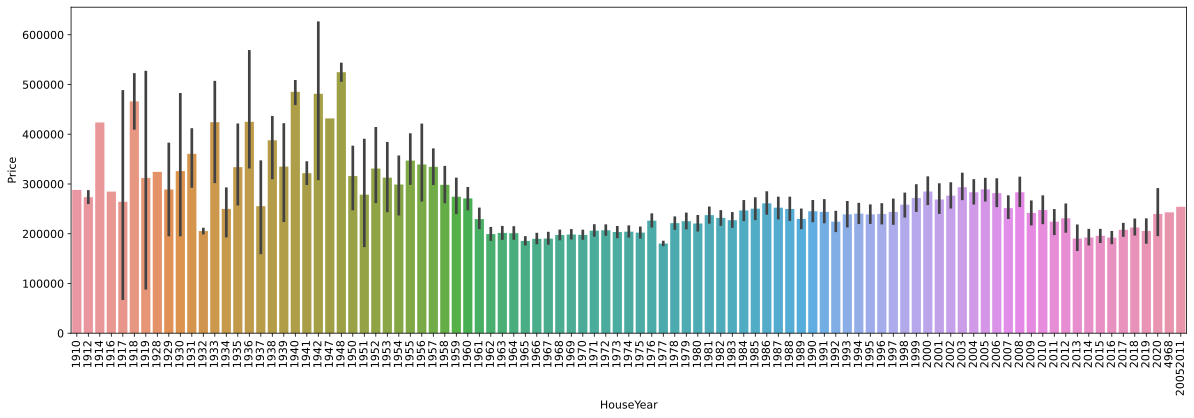

In [38]:
plt.figure(figsize=(20, 6))
sns.barplot(train_data['HouseYear'], train_data['Price'])
plt.xticks(rotation=90)
plt.show()

In [39]:
train_data.loc[train_data['HouseYear'] > 2020, 'HouseYear'] = 2020

**Обработка пропусков (Processing passes):**

In [40]:
train_data.isna().sum()

Id                       0
DistrictId               0
Rooms                    0
Square                   0
LifeSquare            2113
KitchenSquare            0
Floor                    0
HouseFloor               0
HouseYear                0
Ecology_1                0
Ecology_2                0
Ecology_3                0
Social_1                 0
Social_2                 0
Social_3                 0
Healthcare_1          4798
Helthcare_2              0
Shops_1                  0
Shops_2                  0
Price                    0
Rooms_outlier            0
HouseFloor_outlier       0
dtype: int64

In [41]:
train_data[['Square', 'LifeSquare', 'KitchenSquare']].head(10)

Square  LifeSquare  KitchenSquare
0  115.027313         NaN           10.0
1   39.832523   23.169222            8.0
2   78.342216   47.671970           10.0
3   40.409908         NaN            3.0
4   64.285065   38.562515            9.0
5   62.528465   47.103832            6.0
6   33.938751   21.772930            9.0
7   50.391815   32.893257            8.0
8   46.887894   44.628132            3.0
9   79.867477   75.085129            3.0

**LifeSquare (Жилая площадь):**

In [42]:
train_data['LifeSquare_nan'] = train_data['LifeSquare'].isna() * 1

condition = (train_data['LifeSquare'].isna()) \
             & (~train_data['Square'].isna()) \
             & (~train_data['KitchenSquare'].isna())
        
train_data.loc[condition, 'LifeSquare'] = train_data.loc[condition, 'Square'] \
                                            - train_data.loc[condition, 'KitchenSquare'] - 3

In [43]:
train_data['LifeSquare'].sort_values(ascending=False)

8000    7480.592285
9229     638.163208
726      598.705994
5183     461.463623
7010     410.639740
           ...     
6882       1.049867
9869       0.873147
119        0.795539
1829       0.641822
3113       0.370619
Name: LifeSquare, Length: 10000, dtype: float32

**Healthcare_1 (Показатель местности связанный с охраной здоровья):**

In [44]:
train_data.drop('Healthcare_1', axis=1, inplace=True)

In [45]:
class DataPreprocessing:
    """Подготовка исходных данных"""

    def __init__(self):
        """Параметры класса"""
        self.medians=None
        self.kitchen_square_quantile = None
        
    def fit(self, X):
        """Сохранение статистик"""       
        # Расчет медиан
        self.medians = X.median()
        self.kitchen_square_quantile = X['KitchenSquare'].quantile(.975)
        self.life_square_min_value = 10 
        
    def transform(self, X):
        """Трансформация данных"""

        # Rooms
        X['Rooms'].fillna(self.medians.Rooms, inplace=True) 
        X['Rooms_outlier'] = 0
        X.loc[(X['Rooms'] == 0) | (X['Rooms'] >= 6), 'Rooms_outlier'] = 1        
        X.loc[X['Rooms'] == 0, 'Rooms'] = 1
        X.loc[X['Rooms'] >= 6, 'Rooms'] = self.medians['Rooms']
        
        # KitchenSquare
        condition = (X['KitchenSquare'].isna()) \
                    | (X['KitchenSquare'] > self.kitchen_square_quantile)
        
        X.loc[condition, 'KitchenSquare'] = self.medians['KitchenSquare']
        X.loc[X['KitchenSquare'] < 3, 'KitchenSquare'] = 3
        
        # Square
        X['Square'], X['LifeSquare'] = np.where(X['Square'] < X['LifeSquare'],(X['LifeSquare'],X['Square']),
        (X['Square'],X['LifeSquare']))

        X['Square_outlier'] = 0
        X.loc[(X['Square'] < 15), 'Square_outlier'] = 1
        X.loc[X['Square'] < 15] = self.medians['Square']
        
        # HouseFloor, Floor
        X['HouseFloor_outlier'] = 0
        X.loc[X['HouseFloor'] == 0, 'HouseFloor_outlier'] = 1
        X.loc[X['Floor'] > X['HouseFloor'], 'HouseFloor_outlier'] = 1        
        X.loc[X['HouseFloor'] == 0, 'HouseFloor'] = self.medians['HouseFloor']        
        floor_outliers = X.loc[X['Floor'] > X['HouseFloor']].index
        X.loc[floor_outliers, 'Floor'] = X.loc[floor_outliers, 'HouseFloor']\
                                            .apply(lambda x: random.randint(1, x))
        
        # HouseYear
        current_year = datetime.now().year
        
        X['HouseYear_outlier'] = 0
        X.loc[X['HouseYear'] > current_year, 'HouseYear_outlier'] = 1        
        X.loc[X['HouseYear'] > current_year, 'HouseYear'] = current_year
        
        # Healthcare_1
        if 'Healthcare_1' in X.columns:
            X.drop('Healthcare_1', axis=1, inplace=True)
            
        # LifeSquare
        X['LifeSquare_nan'] = X['LifeSquare'].isna() * 1
        condition = (X['LifeSquare'].isna()) & \
                      (~X['Square'].isna()) & \
                      (~X['KitchenSquare'].isna())        
        X.loc[condition, 'LifeSquare'] = X.loc[condition, 'Square'] - X.loc[condition, 'KitchenSquare'] - 3                
        X.fillna(self.medians, inplace=True)        
        return X

### Построение новых признаков (Construction of new features):

**Dummies (Переменные, принимающие значения 0 и 1):**

In [46]:
binary_to_numbers = {'A': 0, 'B': 1}

train_data['Ecology_2'] = train_data['Ecology_2'].replace(binary_to_numbers)
train_data['Ecology_3'] = train_data['Ecology_3'].replace(binary_to_numbers)
train_data['Shops_2'] = train_data['Shops_2'].replace(binary_to_numbers)

**DistrictSize, IsDistrictLarge (Размер района, Большой ли район):**

In [47]:
district_size = train_data['DistrictId'].value_counts().reset_index()\
                    .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})

district_size.head(7)

DistrictId  DistrictSize
0         27           851
1          1           652
2         23           565
3          6           511
4          9           294
5         62           247
6         30           228

In [48]:
train_data = train_data.merge(district_size, on='DistrictId', how='left')
train_data.head(10).transpose()

0         1          2           3         4  \
Id                      11809      3013       8215        2352     13866   
DistrictId                 27        22          1           1        94   
Rooms                       3         1          3           1         2   
Square                115.027   39.8325    78.3422     40.4099   64.2851   
LifeSquare            102.027   23.1692     47.672     34.4099   38.5625   
KitchenSquare              10         8         10           3         9   
Floor                       4         7          2          10        16   
HouseFloor                 10         8         17          22        16   
HouseYear                2014      1966       1988        1977      1972   
Ecology_1           0.0754237  0.118537  0.0256092  0.00712232  0.282798   
Ecology_2                   1         1          1           1         1   
Ecology_3                   1         1          1           1         1   
Social_1                   11        30         33           1        33   
Social_2                 3097      6207       5261         264      8667   
Social_3                    0         1          0           0         2   
Helthcare_2                 0         1          3           0         0   
Shops_1                     0         0          1           1         6   
Shops_2                     1         1          1           1         1   
Price                  305019    177735     282079      168106    343995   
Rooms_outlier               0         0          0           0         0   
HouseFloor_outlier          0         0          0           0         0   
LifeSquare_nan              1         0          0           1         0   
DistrictSize              851        78        652         652        89   

                            5         6          7           8         9  
Id                       5804      8864      13072        9951      8094  
DistrictId                 99        44         59           1         6  
Rooms                       3         1          2           1         3  
Square                62.5285   33.9388    50.3918     46.8879   79.8675  
LifeSquare            47.1038   21.7729    32.8933     44.6281   75.0851  
KitchenSquare               6         9          8           3         3  
Floor                       9         1          8          12         3  
HouseFloor                  9        12         17          20        17  
HouseYear                1972      1968       1986        1977      2014  
Ecology_1           0.0123389  0.232205  0.0195088  0.00712232  0.243205  
Ecology_2                   1         1          1           1         1  
Ecology_3                   1         1          1           1         1  
Social_1                   35        24         37           1         5  
Social_2                 5776      4860       7687         264      1564  
Social_3                    1         1         11           0         0  
Helthcare_2                 2         0          5           0         0  
Shops_1                     4         3          5           1         0  
Shops_2                     1         1          1           1         1  
Price                  161045    142403     326174      160400    194756  
Rooms_outlier               0         0          0           0         0  
HouseFloor_outlier          0         0          0           0         0  
LifeSquare_nan              0         0          0           0         0  
DistrictSize               97       104         67         652       511

In [49]:
(train_data['DistrictSize'] > 100).value_counts()

True     5069
False    4931
Name: DistrictSize, dtype: int64

In [50]:
train_data['IsDistrictLarge'] = (train_data['DistrictSize'] > 100).astype(int)
train_data.head(10).transpose()

0         1          2           3         4  \
Id                      11809      3013       8215        2352     13866   
DistrictId                 27        22          1           1        94   
Rooms                       3         1          3           1         2   
Square                115.027   39.8325    78.3422     40.4099   64.2851   
LifeSquare            102.027   23.1692     47.672     34.4099   38.5625   
KitchenSquare              10         8         10           3         9   
Floor                       4         7          2          10        16   
HouseFloor                 10         8         17          22        16   
HouseYear                2014      1966       1988        1977      1972   
Ecology_1           0.0754237  0.118537  0.0256092  0.00712232  0.282798   
Ecology_2                   1         1          1           1         1   
Ecology_3                   1         1          1           1         1   
Social_1                   11        30         33           1        33   
Social_2                 3097      6207       5261         264      8667   
Social_3                    0         1          0           0         2   
Helthcare_2                 0         1          3           0         0   
Shops_1                     0         0          1           1         6   
Shops_2                     1         1          1           1         1   
Price                  305019    177735     282079      168106    343995   
Rooms_outlier               0         0          0           0         0   
HouseFloor_outlier          0         0          0           0         0   
LifeSquare_nan              1         0          0           1         0   
DistrictSize              851        78        652         652        89   
IsDistrictLarge             1         0          1           1         0   

                            5         6          7           8         9  
Id                       5804      8864      13072        9951      8094  
DistrictId                 99        44         59           1         6  
Rooms                       3         1          2           1         3  
Square                62.5285   33.9388    50.3918     46.8879   79.8675  
LifeSquare            47.1038   21.7729    32.8933     44.6281   75.0851  
KitchenSquare               6         9          8           3         3  
Floor                       9         1          8          12         3  
HouseFloor                  9        12         17          20        17  
HouseYear                1972      1968       1986        1977      2014  
Ecology_1           0.0123389  0.232205  0.0195088  0.00712232  0.243205  
Ecology_2                   1         1          1           1         1  
Ecology_3                   1         1          1           1         1  
Social_1                   35        24         37           1         5  
Social_2                 5776      4860       7687         264      1564  
Social_3                    1         1         11           0         0  
Helthcare_2                 2         0          5           0         0  
Shops_1                     4         3          5           1         0  
Shops_2                     1         1          1           1         1  
Price                  161045    142403     326174      160400    194756  
Rooms_outlier               0         0          0           0         0  
HouseFloor_outlier          0         0          0           0         0  
LifeSquare_nan              0         0          0           0         0  
DistrictSize               97       104         67         652       511  
IsDistrictLarge             0         1          0           1         1

**MedPriceByDistrict (Медиана стоймости в районе):**

In [51]:
med_price_by_district = train_data.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                            .rename(columns={'Price':'MedPriceByDistrict'})

med_price_by_district.head(8).transpose()

0       1       2       3       4       5       6  \
DistrictId               0       0       0       1       1       1       1   
Rooms                    1       2       3       1       2       3       4   
MedPriceByDistrict  142799  176211  300610  146736  202666  244005  277291   

                         7  
DistrictId              10  
Rooms                    1  
MedPriceByDistrict  167743

In [52]:
train_data = train_data.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
train_data.head().transpose()

0         1          2           3         4
Id                      11809      3013       8215        2352     13866
DistrictId                 27        22          1           1        94
Rooms                       3         1          3           1         2
Square                115.027   39.8325    78.3422     40.4099   64.2851
LifeSquare            102.027   23.1692     47.672     34.4099   38.5625
KitchenSquare              10         8         10           3         9
Floor                       4         7          2          10        16
HouseFloor                 10         8         17          22        16
HouseYear                2014      1966       1988        1977      1972
Ecology_1           0.0754237  0.118537  0.0256092  0.00712232  0.282798
Ecology_2                   1         1          1           1         1
Ecology_3                   1         1          1           1         1
Social_1                   11        30         33           1        33
Social_2                 3097      6207       5261         264      8667
Social_3                    0         1          0           0         2
Helthcare_2                 0         1          3           0         0
Shops_1                     0         0          1           1         6
Shops_2                     1         1          1           1         1
Price                  305019    177735     282079      168106    343995
Rooms_outlier               0         0          0           0         0
HouseFloor_outlier          0         0          0           0         0
LifeSquare_nan              1         0          0           1         0
DistrictSize              851        78        652         652        89
IsDistrictLarge             1         0          1           1         0
MedPriceByDistrict     213531    146033     244005      146736    201584

**MedPriceByFloorYear (Медиана стоймости от этаж, год постройки):**

In [53]:
def floor_to_cat(X):
    X['floor_cat'] = 0
    X.loc[X['Floor'] <= 3, 'floor_cat'] = 1  
    X.loc[(X['Floor'] > 3) & (X['Floor'] <= 5), 'floor_cat'] = 2
    X.loc[(X['Floor'] > 5) & (X['Floor'] <= 9), 'floor_cat'] = 3
    X.loc[(X['Floor'] > 9) & (X['Floor'] <= 15), 'floor_cat'] = 4
    X.loc[X['Floor'] > 15, 'floor_cat'] = 5
    return X


def floor_to_cat_pandas(X):
    bins = [0, 3, 5, 9, 15, X['Floor'].max()]
    X['floor_cat'] = pd.cut(X['Floor'], bins=bins, labels=False)    
    X['floor_cat'].fillna(-1, inplace=True)
    return X


def year_to_cat(X):
    X['year_cat'] = 0
    X.loc[X['HouseYear'] <= 1941, 'year_cat'] = 1
    X.loc[(X['HouseYear'] > 1941) & (X['HouseYear'] <= 1945), 'year_cat'] = 2
    X.loc[(X['HouseYear'] > 1945) & (X['HouseYear'] <= 1980), 'year_cat'] = 3
    X.loc[(X['HouseYear'] > 1980) & (X['HouseYear'] <= 2000), 'year_cat'] = 4
    X.loc[(X['HouseYear'] > 2000) & (X['HouseYear'] <= 2010), 'year_cat'] = 5
    X.loc[(X['HouseYear'] > 2010), 'year_cat'] = 6
    return X


def year_to_cat_pandas(X):
    bins = [0, 1941, 1945, 1980, 2000, 2010, X['HouseYear'].max()]
    X['year_cat'] = pd.cut(X['HouseYear'], bins=bins, labels=False)    
    X['year_cat'].fillna(-1, inplace=True)
    return X

In [54]:
bins = [0, 3, 5, 9, 15, train_data['Floor'].max()]
pd.cut(train_data['Floor'], bins=bins, labels=False)

0       1
1       2
2       0
3       3
4       4
       ..
9995    0
9996    3
9997    0
9998    0
9999    2
Name: Floor, Length: 10000, dtype: int64

**Применение функций:**

In [55]:
train_data = year_to_cat(train_data)
train_data = floor_to_cat(train_data)
train_data.head()

Id DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
0  11809         27    3.0  115.027313  102.027313           10.0      4   
1   3013         22    1.0   39.832523   23.169222            8.0      7   
2   8215          1    3.0   78.342216   47.671970           10.0      2   
3   2352          1    1.0   40.409908   34.409908            3.0     10   
4  13866         94    2.0   64.285065   38.562515            9.0     16   

   HouseFloor  HouseYear  Ecology_1  ...  Shops_2          Price  \
0        10.0       2014   0.075424  ...        1  305018.875000   
1         8.0       1966   0.118537  ...        1  177734.546875   
2        17.0       1988   0.025609  ...        1  282078.718750   
3        22.0       1977   0.007122  ...        1  168106.000000   
4        16.0       1972   0.282798  ...        1  343995.093750   

   Rooms_outlier  HouseFloor_outlier  LifeSquare_nan  DistrictSize  \
0              0                   0               1           851   
1              0                   0               0            78   
2              0                   0               0           652   
3              0                   0               1           652   
4              0                   0               0            89   

   IsDistrictLarge  MedPriceByDistrict  year_cat  floor_cat  
0                1       213530.781250         6          2  
1                0       146032.828125         3          3  
2                1       244005.281250         4          1  
3                1       146735.671875         3          4  
4                0       201584.437500         3          5  

[5 rows x 27 columns]

In [56]:
med_price_by_floor_year = train_data.groupby(['year_cat', 'floor_cat'], as_index=False).agg({'Price':'median'}).\
                                            rename(columns={'Price':'MedPriceByFloorYear'})
med_price_by_floor_year.head()

year_cat  floor_cat  MedPriceByFloorYear
0         1          1         357700.71875
1         1          2         321506.28125
2         1          3         429090.87500
3         1          4         274992.46875
4         2          1         467230.53125

In [57]:
train_data = train_data.merge(med_price_by_floor_year, on=['year_cat', 'floor_cat'], how='left')
train_data.head().transpose()

0         1          2           3         4
Id                       11809      3013       8215        2352     13866
DistrictId                  27        22          1           1        94
Rooms                        3         1          3           1         2
Square                 115.027   39.8325    78.3422     40.4099   64.2851
LifeSquare             102.027   23.1692     47.672     34.4099   38.5625
KitchenSquare               10         8         10           3         9
Floor                        4         7          2          10        16
HouseFloor                  10         8         17          22        16
HouseYear                 2014      1966       1988        1977      1972
Ecology_1            0.0754237  0.118537  0.0256092  0.00712232  0.282798
Ecology_2                    1         1          1           1         1
Ecology_3                    1         1          1           1         1
Social_1                    11        30         33           1        33
Social_2                  3097      6207       5261         264      8667
Social_3                     0         1          0           0         2
Helthcare_2                  0         1          3           0         0
Shops_1                      0         0          1           1         6
Shops_2                      1         1          1           1         1
Price                   305019    177735     282079      168106    343995
Rooms_outlier                0         0          0           0         0
HouseFloor_outlier           0         0          0           0         0
LifeSquare_nan               1         0          0           1         0
DistrictSize               851        78        652         652        89
IsDistrictLarge              1         0          1           1         0
MedPriceByDistrict      213531    146033     244005      146736    201584
year_cat                     6         3          4           3         3
floor_cat                    2         3          1           4         5
MedPriceByFloorYear     163047    191875     202046      183595    171931

In [58]:
class FeatureGenetator():
    """Генерация новых фич"""
    
    def __init__(self):
        self.DistrictId_counts = None
        self.binary_to_numbers = None
        self.med_price_by_district = None
        self.med_price_by_floor_year = None
        self.house_year_max = None
        self.floor_max = None
        self.district_size = None
        
    def fit(self, X, y=None):
        
        X = X.copy()
        
        # Binary features
        self.binary_to_numbers = {'A': 0, 'B': 1}
        
        # DistrictID
        self.district_size = X['DistrictId'].value_counts().reset_index() \
                               .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})
                
        # Target encoding
        ## District, Rooms
        df = X.copy()
        
        if y is not None:
            df['Price'] = y.values
            
            self.med_price_by_district = df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                                            .rename(columns={'Price':'MedPriceByDistrict'})
            
            self.med_price_by_district_median = self.med_price_by_district['MedPriceByDistrict'].median()
            
        ## floor, year
        if y is not None:
            self.floor_max = df['Floor'].max()
            self.house_year_max = df['HouseYear'].max()
            df['Price'] = y.values
            df = self.floor_to_cat(df)
            df = self.year_to_cat(df)
            self.med_price_by_floor_year = df.groupby(['year_cat', 'floor_cat'], as_index=False).agg({'Price':'median'}).\
                                            rename(columns={'Price':'MedPriceByFloorYear'})
            self.med_price_by_floor_year_median = self.med_price_by_floor_year['MedPriceByFloorYear'].median()
        

        
    def transform(self, X):
        
        # Binary features
        X['Ecology_2'] = X['Ecology_2'].map(self.binary_to_numbers)  # self.binary_to_numbers = {'A': 0, 'B': 1}
        X['Ecology_3'] = X['Ecology_3'].map(self.binary_to_numbers)
        X['Shops_2'] = X['Shops_2'].map(self.binary_to_numbers)
        
        # DistrictId, IsDistrictLarge
        X = X.merge(self.district_size, on='DistrictId', how='left')       
        X['new_district'] = 0
        X.loc[X['DistrictSize'].isna(), 'new_district'] = 1        
        X['DistrictSize'].fillna(5, inplace=True)        
        X['IsDistrictLarge'] = (X['DistrictSize'] > 100).astype(int)
        
        # More categorical features
        X = self.floor_to_cat(X)  # + столбец floor_cat
        X = self.year_to_cat(X)   # + столбец year_cat
        
        # Target encoding
        if self.med_price_by_district is not None:
            X = X.merge(self.med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
            X.fillna(self.med_price_by_district_median, inplace=True)
            
        if self.med_price_by_floor_year is not None:
            X = X.merge(self.med_price_by_floor_year, on=['year_cat', 'floor_cat'], how='left')
            X.fillna(self.med_price_by_floor_year_median, inplace=True)
        
        return X
    
    def floor_to_cat(self, X):
        bins = [0, 3, 5, 9, 15, self.floor_max]
        X['floor_cat'] = pd.cut(X['Floor'], bins=bins, labels=False)
        X['floor_cat'].fillna(-1, inplace=True) 
        return X
     
    def year_to_cat(self, X):
        bins = [0, 1941, 1945, 1980, 2000, 2010, self.house_year_max]
        X['year_cat'] = pd.cut(X['HouseYear'], bins=bins, labels=False)
        X['year_cat'].fillna(-1, inplace=True)
        return X

**Отбор признаков (Feature selection):**

In [59]:
train_data.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'Rooms_outlier',
 'HouseFloor_outlier',
 'LifeSquare_nan',
 'DistrictSize',
 'IsDistrictLarge',
 'MedPriceByDistrict',
 'year_cat',
 'floor_cat',
 'MedPriceByFloorYear']

In [60]:
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Social_1', 'Social_2', 'Social_3',
                 'Helthcare_2', 'Shops_1']

new_feature_names = [  'DistrictSize', 'IsDistrictLarge',  'MedPriceByDistrict', 'MedPriceByFloorYear']

target_name = 'Price'

In [61]:
train_data.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'Rooms_outlier',
 'HouseFloor_outlier',
 'LifeSquare_nan',
 'DistrictSize',
 'IsDistrictLarge',
 'MedPriceByDistrict',
 'year_cat',
 'floor_cat',
 'MedPriceByFloorYear']

**Разбиение на train и test (Splitting into train and test dataframe):**

In [62]:
train_data = pd.read_csv('V:/train.csv')
test_data = pd.read_csv('V:/test.csv')

X = train_data.drop(columns=target_name)
y = train_data[target_name]

In [63]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

In [64]:
preprocessor = DataPreprocessing()
preprocessor.fit(X_train)

X_train = preprocessor.transform(X_train)
X_valid = preprocessor.transform(X_valid)
test_data = preprocessor.transform(test_data)

X_train.shape, X_valid.shape, test_data.shape

((7000, 23), (3000, 23), (5000, 23))

In [65]:
features_gen = FeatureGenetator()
features_gen.fit(X_train, y_train)

X_train = features_gen.transform(X_train)
X_valid = features_gen.transform(X_valid)
test_data = features_gen.transform(test_data)

X_train.shape, X_valid.shape, test_data.shape

((7000, 30), (3000, 30), (5000, 30))

In [66]:
X_train = X_train[feature_names + new_feature_names]
X_valid = X_valid[feature_names + new_feature_names]
test_data = test_data[feature_names + new_feature_names]

In [67]:
X_train.isna().sum().sum(), X_valid.isna().sum().sum(), test_data.isna().sum().sum()

(0, 0, 0)

**Построение модели (Building the model):**

In [68]:
rf_model = RandomForestRegressor(random_state=42, 
                                 criterion='mse',  
                                 min_samples_leaf = 30,
                                 max_depth=6,
                                 n_estimators=410,)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=30, n_estimators=410,
                      random_state=42)

Train R2:	0.754
Test R2:	0.634
Train MSE:	2055433384.82
Test MSE:	3373670446.047


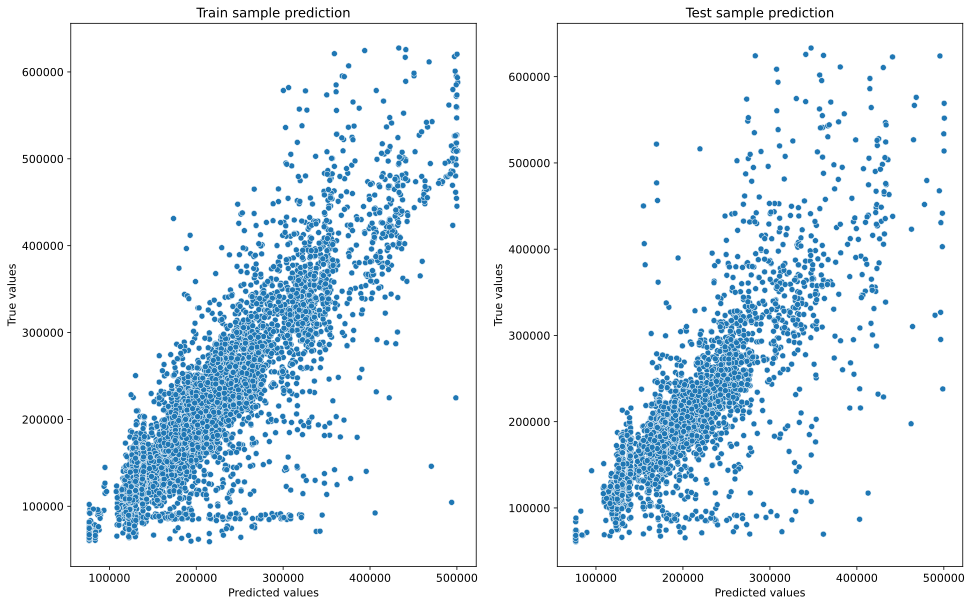

In [69]:
y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

**RandomForestRegressor Кросс-валидация (Cross validation): **


In [70]:
cv_score = cross_val_score(rf_model, X_train, y_train, scoring='r2', cv=KFold(n_splits=4, shuffle=True, random_state=21))
cv_score

array([0.71567241, 0.7343629 , 0.71210142, 0.71840637])

In [71]:
cv_score.mean()

0.7201357765081975


**Важность признаков (The imoprtance of features):**


In [72]:
feature_importances = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

feature_name  importance
15   MedPriceByDistrict    0.836213
1                Square    0.099870
13         DistrictSize    0.013699
16  MedPriceByFloorYear    0.008112
3         KitchenSquare    0.007376
10             Social_3    0.007082
6             HouseYear    0.005528
5            HouseFloor    0.004239
2            LifeSquare    0.003815
9              Social_2    0.003721
8              Social_1    0.003062
0                 Rooms    0.002749
4                 Floor    0.001938
7             Ecology_1    0.000926
12              Shops_1    0.000899
11          Helthcare_2    0.000742
14      IsDistrictLarge    0.000029

**DecisionTreeRegressor:**

In [73]:
%%time
dt_model = DecisionTreeRegressor(criterion = 'mse', min_samples_leaf = 40,
                                     max_depth=8, random_state=42)
dt_model.fit(X_train, y_train)

Wall time: 32 ms


DecisionTreeRegressor(max_depth=8, min_samples_leaf=40, random_state=42)

Train R2:	0.751
Test R2:	0.63
Train MSE:	2084864048.605
Test MSE:	3409637698.637


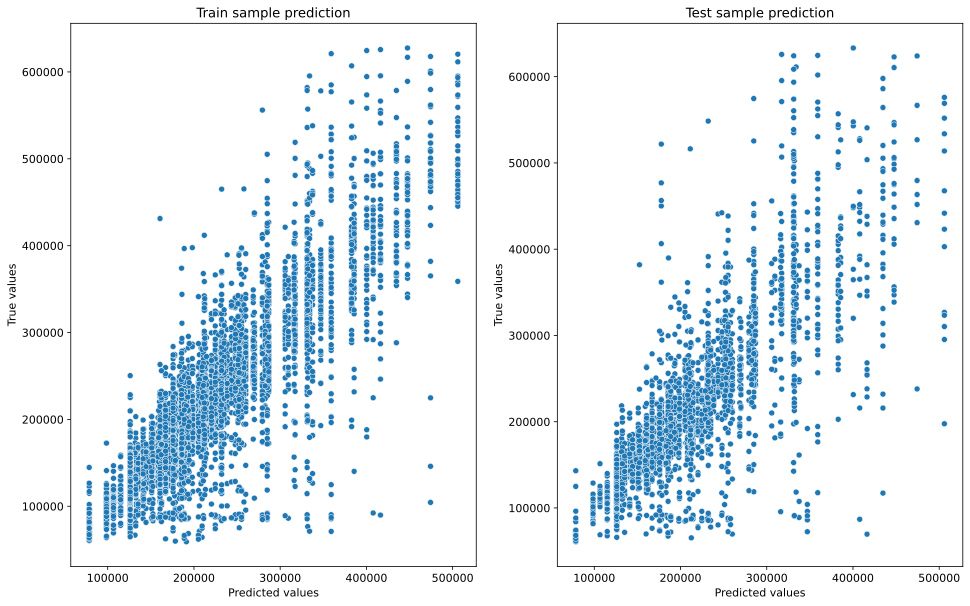

In [74]:
y_train_preds = dt_model.predict(X_train)
y_test_preds = dt_model.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

**GradientBoostingRegressor:**

In [75]:
%%time
gb_model = GradientBoostingRegressor(criterion = 'mse',
                                    min_samples_leaf = 30,
                                     max_depth=8,
                                     random_state=42,  
                                     n_estimators=900, 
                                     max_features='sqrt', 
                                     loss='huber',
                                     learning_rate=0.020)
gb_model.fit(X_train, y_train)

Wall time: 19 s


GradientBoostingRegressor(criterion='mse', learning_rate=0.02, loss='huber',
                          max_depth=8, max_features='sqrt', min_samples_leaf=30,
                          n_estimators=900, random_state=42)

Train R2:	0.878
Test R2:	0.712
Train MSE:	1021185716.033
Test MSE:	2651439263.301


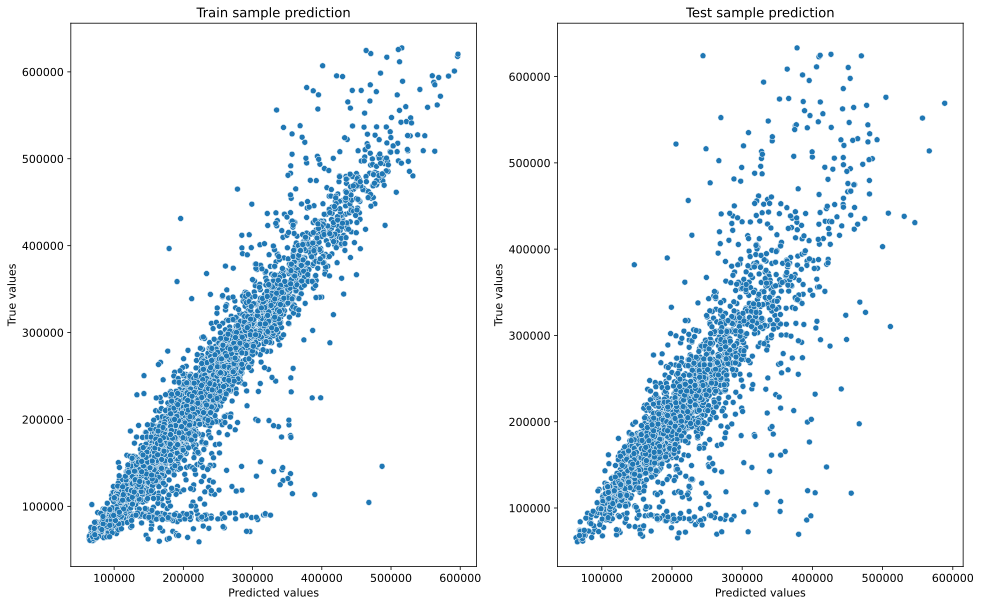

In [76]:
y_train_preds = gb_model.predict(X_train)
y_test_preds = gb_model.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

**GradientBoostingRegressor Кросс-валидация (Cross validation): **

In [77]:
cv_score = cross_val_score(gb_model, X_train, y_train, scoring='r2', cv=KFold(n_splits=4, shuffle=True, random_state=21))
cv_score


array([0.75096828, 0.76777266, 0.77974923, 0.77311294])

In [78]:
cv_score.mean()

0.7679007781596502

**Testing GridSearchCV :**

In [79]:
"""%%time
params = {'n_estimators':[50, 100, 150, 200, 400, 500, 600, 700, 800, 900], 
          'max_depth':[3, 4, 5, 6, 7, 8, 10],
          'min_samples_leaf':[20, 30, 40, 50, 60, 70, 80, 100],
          'learning_rate':[0.01, 0.015, 0.020, 0.025]}

gs = GridSearchCV(gb_model, params, 
                  scoring='r2', # метрика 
                  cv=KFold(n_splits=5,   # k (кол-во разбиений/итераций) в кросс-валидации
                           random_state=21, 
                           shuffle=True),
                  n_jobs=-1
                  )
gs.fit(X_train, y_train) """

"%%time\nparams = {'n_estimators':[50, 100, 150, 200, 400, 500, 600, 700, 800, 900], \n          'max_depth':[3, 4, 5, 6, 7, 8, 10],\n          'min_samples_leaf':[20, 30, 40, 50, 60, 70, 80, 100],\n          'learning_rate':[0.01, 0.015, 0.020, 0.025]}\n\ngs = GridSearchCV(gb_model, params, \n                  scoring='r2', # метрика \n                  cv=KFold(n_splits=5,   # k (кол-во разбиений/итераций) в кросс-валидации\n                           random_state=21, \n                           shuffle=True),\n                  n_jobs=-1\n                  )\ngs.fit(X_train, y_train) "

In [80]:
"""res = pd.DataFrame(gs.cv_results_)

res.head(64).transpose()"""

'res = pd.DataFrame(gs.cv_results_)\n\nres.head(64).transpose()'

### Идея более сложных моделей (The idea of more complex models):


**VotingRegressor:**


In [81]:
lr = LinearRegression()
vr_model = VotingRegressor([('gb', gb_model), ('rf', rf_model)])
vr_model.fit(X_train, y_train)

VotingRegressor(estimators=[('gb',
                             GradientBoostingRegressor(criterion='mse',
                                                       learning_rate=0.02,
                                                       loss='huber',
                                                       max_depth=8,
                                                       max_features='sqrt',
                                                       min_samples_leaf=30,
                                                       n_estimators=900,
                                                       random_state=42)),
                            ('rf',
                             RandomForestRegressor(max_depth=6,
                                                   min_samples_leaf=30,
                                                   n_estimators=410,
                                                   random_state=42))])

Train R2:	0.833
Test R2:	0.687
Train MSE:	1396465849.524
Test MSE:	2885697716.996


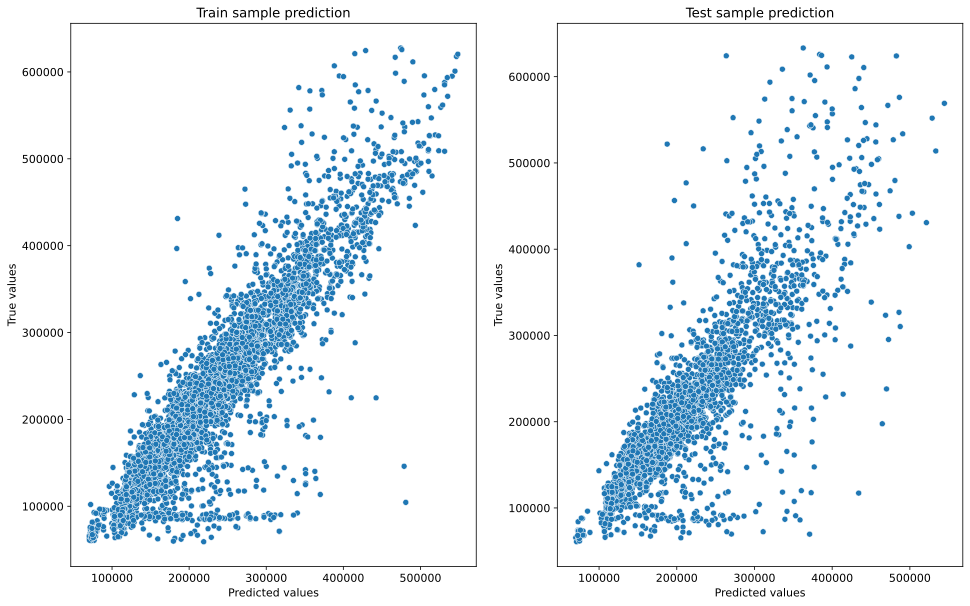

In [82]:
y_train_preds = vr_model.predict(X_train)
y_test_preds = vr_model.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

**Trying StackingRegressor:**

In [83]:
%%time

lr = LinearRegression()

stack = StackingRegressor([('lr', lr), ('rf', rf_model)], final_estimator=gb_model)
stack.fit(X_train, y_train)

Wall time: 48.8 s


StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('rf',
                               RandomForestRegressor(max_depth=6,
                                                     min_samples_leaf=30,
                                                     n_estimators=410,
                                                     random_state=42))],
                  final_estimator=GradientBoostingRegressor(criterion='mse',
                                                            learning_rate=0.02,
                                                            loss='huber',
                                                            max_depth=8,
                                                            max_features='sqrt',
                                                            min_samples_leaf=30,
                                                            n_estimators=900,
                                                            random_state=42))

Train R2:	0.756
Test R2:	0.627
Train MSE:	2042484383.124
Test MSE:	3437439063.56


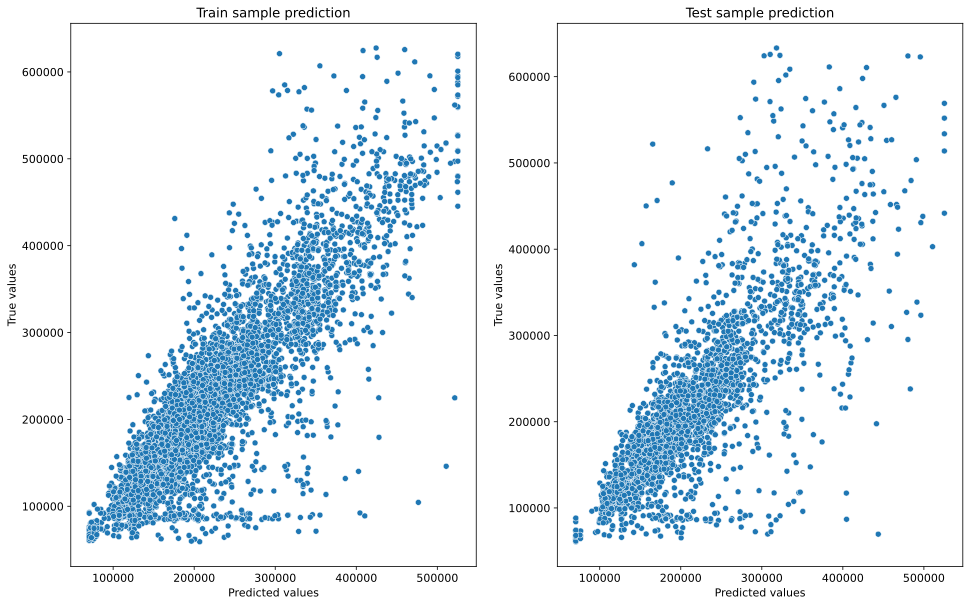

In [84]:
y_train_preds = stack.predict(X_train)
y_test_preds = stack.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)


**Прогнозирование на тестовом датасете (Prediction on a test dataset):**

In [85]:
test_data.shape

(5000, 17)

In [86]:
test_data

Rooms     Square  LifeSquare  KitchenSquare  Floor  HouseFloor  \
0       1.0  36.847630   19.094182            5.0    5.0         9.0   
1       1.0  42.568133   42.493907           10.0    7.0        17.0   
2       2.0  59.463678   47.463678            9.0   19.0        19.0   
3       3.0  49.646030   33.893825            6.0    2.0         2.0   
4       1.0  53.837056   47.837056            3.0    8.0        17.0   
...     ...        ...         ...            ...    ...         ...   
4995    2.0  43.177521   30.339945            5.0    2.0         5.0   
4996    3.0  94.521465   93.698122           10.0   21.0        27.0   
4997    1.0  33.656723   19.003259            5.0    2.0         5.0   
4998    1.0  38.635155   20.976257            9.0    8.0        14.0   
4999    2.0  67.122742   33.944344            6.0    9.0        17.0   

      HouseYear  Ecology_1  Social_1  Social_2  Social_3  Helthcare_2  \
0        1970.0   0.036122      24.0    4378.0       0.0          1.0   
1        2017.0   0.072158       2.0     629.0       1.0          0.0   
2        1977.0   0.211401       9.0    1892.0       0.0          0.0   
3        1965.0   0.014073       2.0     475.0       0.0          0.0   
4        1977.0   0.309479      35.0    7715.0       4.0          0.0   
...         ...        ...       ...       ...       ...          ...   
4995     1962.0   0.069660      31.0    6119.0       4.0          1.0   
4996     2018.0   0.060753      15.0    2787.0       2.0          0.0   
4997     1966.0   0.038693      28.0    6533.0       1.0          2.0   
4998     1970.0   0.089040      33.0    7976.0       5.0          0.0   
4999     2009.0   0.194489      47.0    8004.0       3.0          3.0   

      Shops_1  DistrictSize  IsDistrictLarge  MedPriceByDistrict  \
0         1.0          73.0                0       167155.991565   
1         0.0         173.0                1       128808.353899   
2         1.0         593.0                1       163063.296643   
3         0.0         390.0                1       155760.419689   
4         6.0          79.0                0       162138.526832   
...       ...           ...              ...                 ...   
4995      2.0          62.0                0       182179.074960   
4996      7.0          24.0                0       419315.944641   
4997      5.0          71.0                0       147558.827674   
4998     11.0          36.0                0       166024.537530   
4999      5.0         124.0                1       182602.286983   

      MedPriceByFloorYear  
0           188478.433427  
1           169599.404160  
2           174339.691014  
3           179635.283119  
4           191371.457255  
...                   ...  
4995        179635.283119  
4996        219442.343899  
4997        179635.283119  
4998        191371.457255  
4999        228801.342818  

[5000 rows x 17 columns]

In [87]:
submit = pd.read_csv('V:/sample_submission.csv')
submit.head(7)

Id     Price
0  4567  200000.0
1  5925  200000.0
2   960  200000.0
3  3848  200000.0
4   746  200000.0
5   868  200000.0
6   672  200000.0

**Выбираю модель GradientBoostingRegressor, как самую точную.**

In [88]:
predictions = gb_model.predict(test_data)
predictions

array([164176.20824553, 124106.03756158, 139351.01327879, ...,
       149607.41672873, 181315.64713487, 248684.8856824 ])

In [89]:
submit['Price'] = predictions
submit.head()

Id          Price
0  4567  164176.208246
1  5925  124106.037562
2   960  139351.013279
3  3848  116788.785241
4   746  183111.640272

In [90]:
submit.to_csv('gb8_submit.csv', index=False)

In [91]:
pip freeze

alabaster==0.7.12
anaconda-client==1.7.2
anaconda-navigator==1.10.0
anaconda-project==0.8.3
argh==0.26.2Note: you may need to restart the kernel to use updated packages.

argon2-cffi @ file:///C:/ci/argon2-cffi_1596828585465/work
asn1crypto @ file:///tmp/build/80754af9/asn1crypto_1596577642040/work
astroid @ file:///C:/ci/astroid_1592487315634/work
astropy==4.0.2
async-generator==1.10
atomicwrites==1.4.0
attrs @ file:///tmp/build/80754af9/attrs_1604765588209/work
autopep8 @ file:///tmp/build/80754af9/autopep8_1596578164842/work
Babel @ file:///tmp/build/80754af9/babel_1605108370292/work
backcall==0.2.0
backports.functools-lru-cache==1.6.1
backports.shutil-get-terminal-size==1.0.0
backports.tempfile==1.0
backports.weakref==1.0.post1
bcrypt @ file:///C:/ci/bcrypt_1597936263757/work
beautifulsoup4 @ file:///tmp/build/80754af9/beautifulsoup4_1601924105527/work
bitarray @ file:///C:/ci/bitarray_1605065210072/work
bkcharts==0.2
bleach @ file:///tmp/build/80754af9/bleach_1600439572647/work
bo